# The University of Hong Kong
## DASC7600 Data Science Project 2024
## EDA - HK - Average Humidity

# Import Modules and Settings

In [1]:
import os
import sys

# Add project directory to system path
project_dir = os.path.dirname(os.getcwd())
sys.path.append(project_dir)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import covid_module

# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [3]:
# Read csv file
## Dataset name: Daily mean relative humidity
## Data resource name: Daily Mean Relative Humidity All Year - Hong Kong Observatory
## URL: https://data.gov.hk/en-data/dataset/hk-hko-rss-daily-mean-relative-humidity/resource/c1f699d6-66d1-4723-9f7f-c0bb0685a76d
hk_daily_avg_humid_df = pd.read_csv(project_dir + '/data/raw_data/hk/daily_HKO_RH_ALL.csv', skiprows=2)

# Basic Information of Data Set

In [4]:
# Print first 5 records
hk_daily_avg_humid_df.head(5)

,年/Year,月/Month,日/Day,數值/Value,數據完整性/data Completeness
0,1947,1.0,1.0,85.0,C
1,1947,1.0,2.0,86.0,C
2,1947,1.0,3.0,84.0,C
3,1947,1.0,4.0,85.0,C
4,1947,1.0,5.0,85.0,C


In [5]:
# Print last 5 records
hk_daily_avg_humid_df.tail(5)

,年/Year,月/Month,日/Day,數值/Value,數據完整性/data Completeness
28396,2024,9.0,29.0,76.0,C
28397,2024,9.0,30.0,71.0,C
28398,*** 沒有數據/unavailable,NaN,NaN,NaN,NaN
28399,# 數據不完整/data incomplete,NaN,NaN,NaN,NaN
28400,C 數據完整/data Complete,NaN,NaN,NaN,NaN


Missing values are represented by '***' <br>
The column '數據完整性/data Completeness' is an indicator column for data completeness, where the value 'C' represent the data is complete.

In [6]:
# Basic information of dataframe
hk_daily_avg_humid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28401 entries, 0 to 28400
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   年/Year                   28401 non-null  object 
 1   月/Month                  28398 non-null  float64
 2   日/Day                    28398 non-null  float64
 3   數值/Value                 28398 non-null  float64
 4   數據完整性/data Completeness  28398 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.1+ MB


# Drop Rows

In [7]:
# We only consider records with complete data in this EDA
# Remove records with incomplete data and comment rows
hk_daily_avg_humid_df = hk_daily_avg_humid_df[hk_daily_avg_humid_df['數據完整性/data Completeness'] == 'C']

# Add Date Column

In [8]:
# Combine year, month and day columns
hk_daily_avg_humid_df['report_date'] = hk_daily_avg_humid_df['年/Year'].astype('int').astype('str') \
    + '/' \
    + hk_daily_avg_humid_df['月/Month'].astype('int').astype('str') \
    + '/' \
    + hk_daily_avg_humid_df['日/Day'].astype('int').astype('str')

# Modify Data Type

In [9]:
# Modify data type to datatime
hk_daily_avg_humid_df['report_date'] = pd.to_datetime(hk_daily_avg_humid_df['report_date'], format='%Y/%m/%d')

# Modify data type to float
hk_daily_avg_humid_df['數值/Value'] = hk_daily_avg_humid_df['數值/Value'].astype('float')

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Field - 數值/Value (Humidity)

In [20]:
# Date range of valid temperature 
min_humid, max_humid = hk_daily_avg_humid_df['數值/Value'].agg(['min', 'max']).to_list()
print(f'Min Relative Humidity: {min_humid} %')
print(f'Max Relative Humidity: {max_humid} %')

Min Relative Humidity: 21.0%
Max Relative Humidity: 99.0%


### Field - 年/Year

In [10]:
# Distinct values in year column
print('Distinct values in year column are:',
      str(hk_daily_avg_humid_df['年/Year'].drop_duplicates().sort_values().to_list())[1:-1])

Distinct values in year column are: '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'


### Field - 月/Month

In [11]:
# Distinct values in month column
print('Distinct values in month column are:',
      str(hk_daily_avg_humid_df['月/Month'].drop_duplicates().sort_values().to_list())[1:-1])

Distinct values in month column are: 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0


### Field - 日/Day

In [12]:
# Distinct values in day column
print('Distinct values in day column are:',
      str(hk_daily_avg_humid_df['日/Day'].drop_duplicates().sort_values().to_list())[1:-1])

Distinct values in day column are: 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0


## Multivariate Analysis

### Fields - 年/Year, 月/Month and 日/Day

In [13]:
# Date range of valid temperature 
min_date, max_date = hk_daily_avg_humid_df['report_date'].agg(['min', 'max']).astype('str').to_list()
print('Date range of valid humidity:')
print(f'Min date: {min_date}')
print(f'Max date: {max_date}')

Date range of valid Mean Humidity:
Min date: 1947-01-01
Max date: 2024-09-30


In [24]:
# Dates which are not included in the dataset
hk_daily_avg_humid_df = hk_daily_avg_humid_df.set_index('report_date')
missing_date_index = pd.date_range(start=min_date, end=max_date).difference(hk_daily_avg_humid_df.index).astype('str')

if len(missing_date_index) == 0:
    print('There is no missing date in the dataset.')
elif len(missing_date_index) == 1:
    print(f'There is a missing date in the dataset, which is {missing_date_index[0]}.')
else:
    print(f'There are missing dates in the dataset, between {missing_date_index.min()} and {missing_date_index.max()}.')

There is a missing date in the dataset, which is 1957-09-22.


Since we are using this humidity dataset for COVID-19 analysis, the absence of humidity data for the year 1957 has no impact on our analysis.

### Fields - 年/Year, 月/Month, 日/Day and 數值/Value

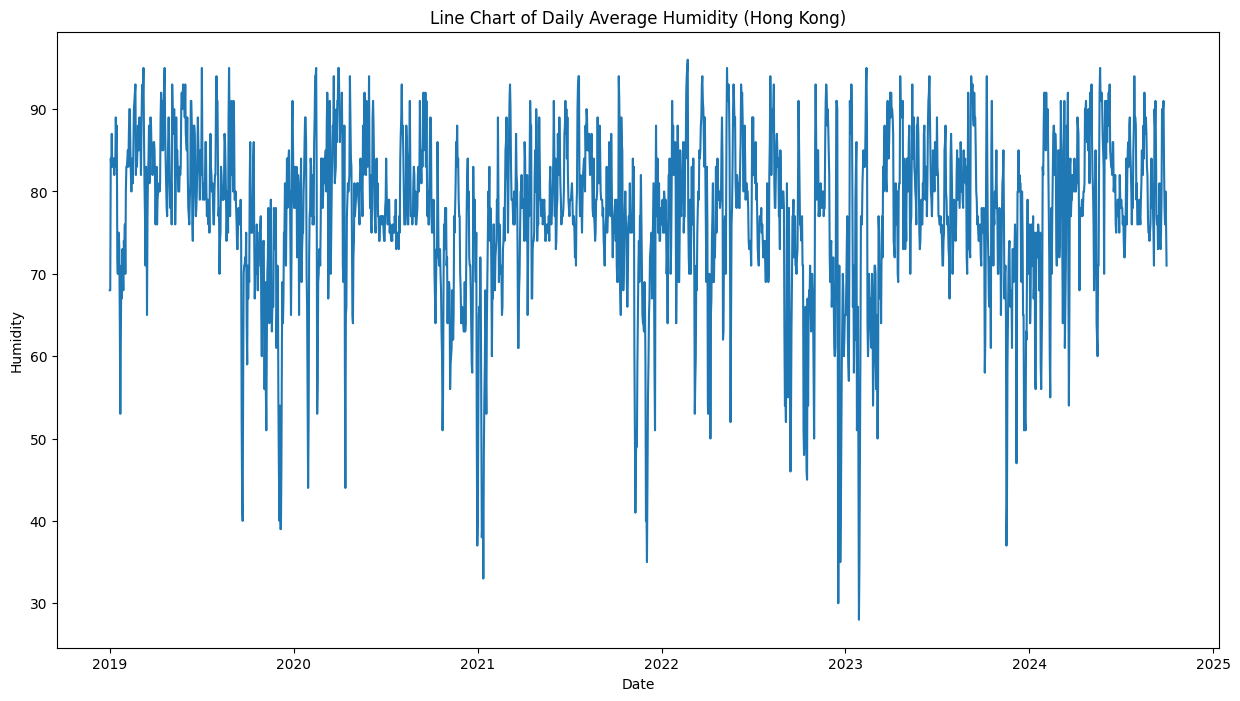

In [26]:
# Line chart - Daily Humidity
hk_daily_humid_from_2019 = hk_daily_avg_humid_df[hk_daily_avg_humid_df.index >= pd.to_datetime('2019-01-01')]

plt.subplots(figsize=(15, 8))
plt.plot(hk_daily_humid_from_2019.index, hk_daily_humid_from_2019['數值/Value'])
plt.title('Line Chart of Daily Average Humidity (Hong Kong)')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

## Missing Value Analysis

In [27]:
# Number of missing values in each column
print('For the records having the value "C" in column "數據完整性/data Completeness",')
covid_module.print_missing_val_count(hk_daily_avg_humid_df)

For the records having the value "C" in column "數據完整性/data Completeness",
This dataframe does not have missing values.
